In [48]:
import datetime
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint
%matplotlib inline

In [75]:
df = pd.read_csv("C:\\Users\\Christian\\Documents\\Auction Parser\\professions.csv")
df.head(-1)

#print(df.iloc[0][' Item ID'])

,Year,Month,Date,Hour,Weekday,Item ID,Item Name,Min. Buyout,Number of Auctions
0,2019,11,11,22,0,6371,Fire Oil,1995,102
1,2019,11,11,22,0,5634,Free Action Potion,15597,568
2,2019,11,11,22,0,9030,Restorative Potion,34899,129
3,2019,11,11,22,0,7067,Elemental Earth,23750,53
4,2019,11,11,22,0,3821,Goldthorn,2963,47
5,2019,11,11,22,0,13423,Stonescale Oil,1490,23
6,2019,11,11,22,0,9264,Elixir of Shadow Power,29600,31
7,2019,11,11,22,0,8845,Ghost Mushroom,8966,60
8,2019,11,11,22,0,13511,Flask of Distilled Wisdom,1638383,8
9,2019,11,11,22,0,13468,Black Lotus,1050000,9


2019


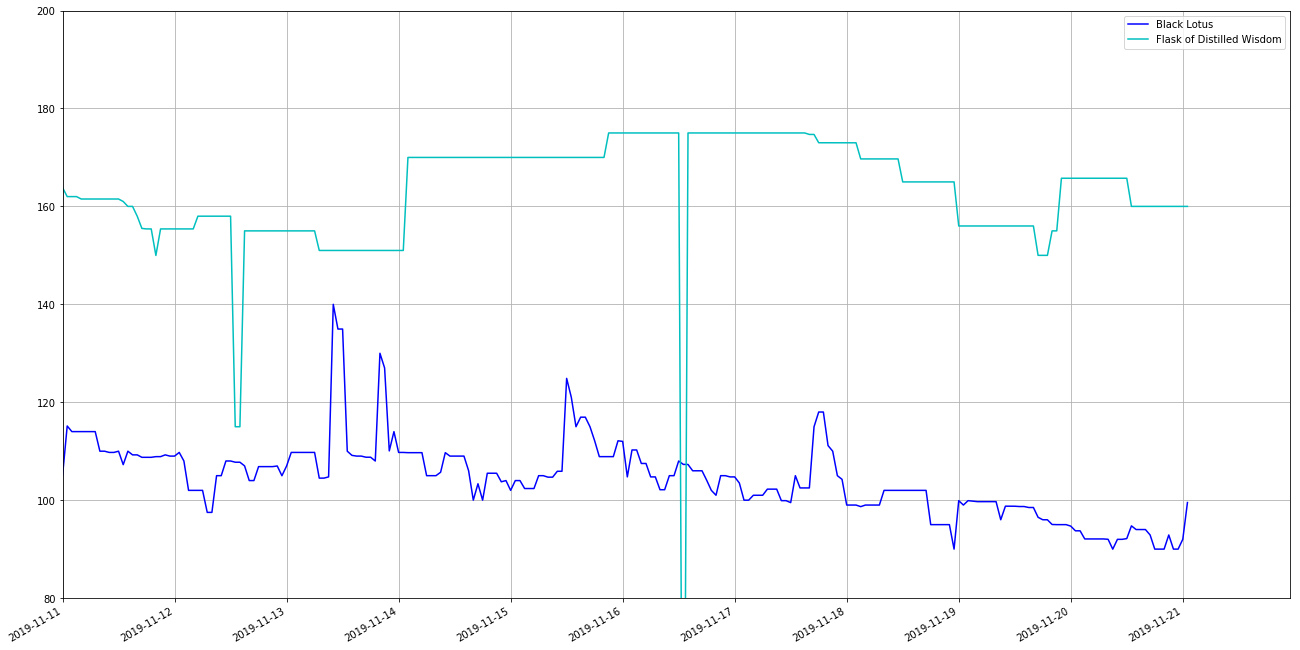

In [76]:
#print(df.iloc[462])

# 24-Hour Cycle for Flask of Distilled Wisdom
blackLotusPrices = []
dreamFoilPrices = []
iceCapPrices = []
flaskPrices = []
for index, row in df.iterrows():
    if (int(row[' Item ID']) == 13511): # Flask of Distilled Wisdom
        flaskPrices.append(row.values)
    elif (row[' Item ID'] == 13463): # Dreamfoil
        dreamFoilPrices.append(row.values)
    elif (row[' Item ID'] == 13467): # Ice Cap
        iceCapPrices.append(row.values)
    elif (row[' Item ID'] == 13468): # Black Lotus
        blackLotusPrices.append(row.values)
        
print(blackLotusPrices[-1][0])

# Collect entries from the week before 11/20 (11/12-11/19)
weeklyBlackLotusPrices = []
weeklyFlaskPrices = []
weeklyDreamFoilPrices = []
weeklyIceCapPrices = []

for entry in blackLotusPrices:
    if (entry[0] >= 2019) and (entry[1] <= 11) and (entry[2] >= 11) and (entry[2] <= 21):
        weeklyBlackLotusPrices.append((entry[7], entry[1], entry[2], entry[0], entry[3]))
        
for entry in dreamFoilPrices:
    if (entry[0] >= 2019) and (entry[1] <= 11) and (entry[2] >= 11) and (entry[2] <= 21):
        weeklyDreamFoilPrices.append((entry[7], entry[1], entry[2], entry[0], entry[3]))
        
for entry in iceCapPrices:
    if (entry[0] >= 2019) and (entry[1] <= 11) and (entry[2] >= 11) and (entry[2] <= 21):
        weeklyIceCapPrices.append((entry[7], entry[1], entry[2], entry[0], entry[3]))
        
for entry in flaskPrices:
    if (entry[0] >= 2019) and (entry[1] <= 11) and (entry[2] >= 11) and (entry[2] <= 21):
        weeklyFlaskPrices.append((entry[7], entry[1], entry[2], entry[0], entry[3]))
        
#print(weeklyBlackLotusPrices)
# Collect Min Buyouts
blackLotusPrices = []
dreamFoilPrices = []
iceCapPrices = []
flaskPrices = []

for entry in weeklyBlackLotusPrices:
    blackLotusPrices.append(entry[0] / 10000)

for entry in weeklyDreamFoilPrices:
    dreamFoilPrices.append((entry[0] / 10000)*20)
    
for entry in weeklyIceCapPrices:
    iceCapPrices.append((entry[0] / 10000)*20)
    
for entry in weeklyFlaskPrices:
    flaskPrices.append(entry[0] / 10000)

# Construct X-Axis
customDate = datetime.datetime(2019, 11, 11, 0)
x = [customDate + datetime.timedelta(hours=i) for i in range(len(blackLotusPrices))]

#print(x)

xStartDate = datetime.datetime(2019, 11, 11, 0)
xEndDate = datetime.datetime(2019, 11, 21, 23)

plt.figure(figsize=(22,12))
plt.grid()
left, right = plt.xlim(xStartDate,xEndDate)
bottom, top = plt.ylim(80,200)

plt.plot(x, blackLotusPrices, '-b', label = "Black Lotus")
#plt.plot(x, dreamFoilPrices, 'o-g', label = "Dreamfoil")
#plt.plot(x, iceCapPrices, 'o-y', label = "Ice Cap")
plt.plot(x, flaskPrices, '-c', label = "Flask of Distilled Wisdom")



plt.legend()

plt.gcf().autofmt_xdate()
plt.show()
